In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [3]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


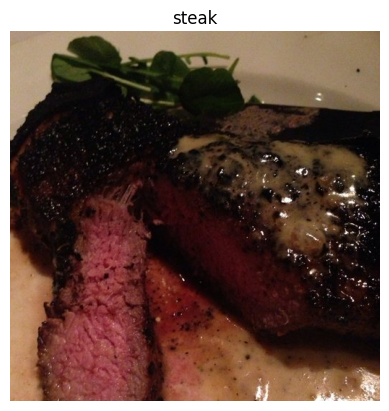

In [6]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1 / 255)
test_datagen = ImageDataGenerator(rescale = 1 / 255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [9]:
model_1 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_1.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

history_1 = model_1.fit(train_data,
            epochs = 5,
            validation_data = test_data)

Epoch 1/5
235/235 [==============================] - 54s 218ms/step - loss: 2.1598 - accuracy: 0.2107 - val_loss: 2.0159 - val_accuracy: 0.2700
Epoch 2/5
235/235 [==============================] - 19s 79ms/step - loss: 1.9194 - accuracy: 0.3277 - val_loss: 1.9264 - val_accuracy: 0.3196
Epoch 3/5
235/235 [==============================] - 18s 78ms/step - loss: 1.5886 - accuracy: 0.4643 - val_loss: 1.9501 - val_accuracy: 0.3360
Epoch 4/5
235/235 [==============================] - 23s 100ms/step - loss: 1.0617 - accuracy: 0.6515 - val_loss: 2.4374 - val_accuracy: 0.3000
Epoch 5/5
235/235 [==============================] - 21s 90ms/step - loss: 0.4560 - accuracy: 0.8560 - val_loss: 3.1451 - val_accuracy: 0.2656


In [10]:
model_1.evaluate(test_data)

79/79 [==============================] - 5s 63ms/step - loss: 3.1451 - accuracy: 0.2656


[3.14508056640625, 0.2655999958515167]

In [11]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

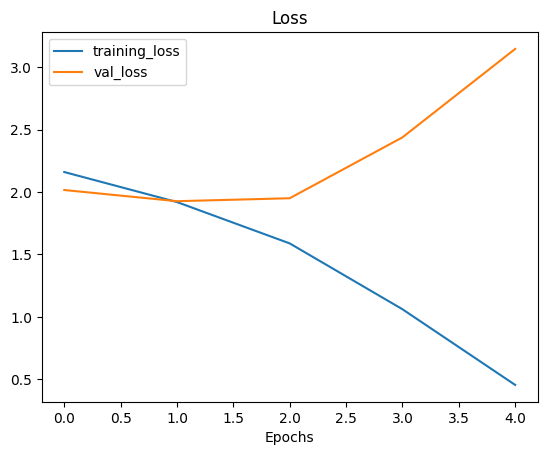

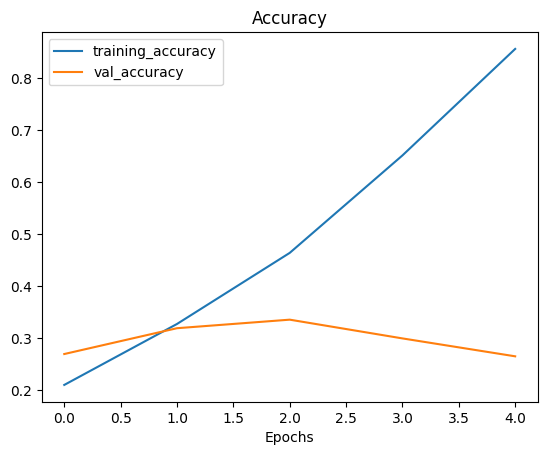

In [12]:
plot_loss_curves(history_1)

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
model_2 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_2.compile(
    optimizer = "adam",
    metrics = ["accuracy"],
    loss = "categorical_crossentropy"
)

history_2 = model_2.fit(
    train_data,
    validation_data = test_data,
    epochs = 5
)

Epoch 1/5
235/235 [==============================] - 20s 82ms/step - loss: 2.1215 - accuracy: 0.2249 - val_loss: 1.9193 - val_accuracy: 0.3280
Epoch 2/5
235/235 [==============================] - 19s 80ms/step - loss: 1.8702 - accuracy: 0.3575 - val_loss: 1.8702 - val_accuracy: 0.3616
Epoch 3/5
235/235 [==============================] - 19s 82ms/step - loss: 1.7188 - accuracy: 0.4139 - val_loss: 1.8030 - val_accuracy: 0.3628
Epoch 4/5
235/235 [==============================] - 23s 97ms/step - loss: 1.5648 - accuracy: 0.4769 - val_loss: 1.8075 - val_accuracy: 0.3728
Epoch 5/5
235/235 [==============================] - 20s 86ms/step - loss: 1.3989 - accuracy: 0.5292 - val_loss: 1.9241 - val_accuracy: 0.3620


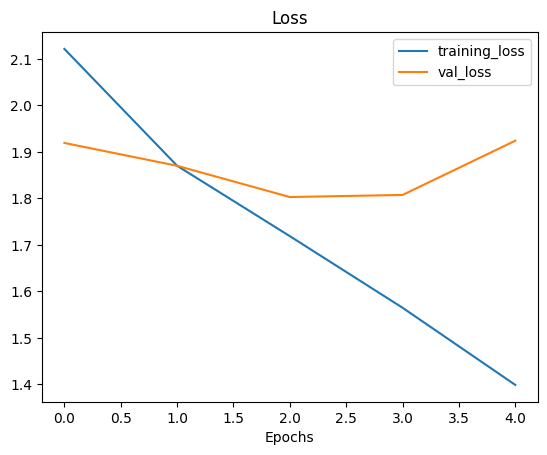

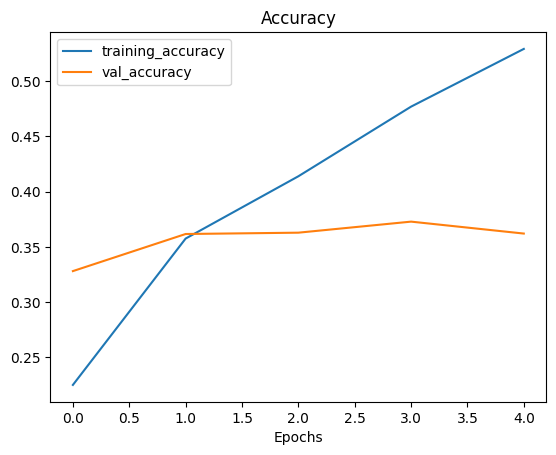

In [15]:
plot_loss_curves(history_2)

In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

Hmm... even with a simplifed model, it looks like our model is still dramatically overfitting the training data.

What else could we try?

How about **data augmentation**?

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

To create augmented data, we'll recreate a new [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instance, this time adding some parameters such as `rotation_range` and `horizontal_flip` to manipulate our images.

In [19]:
train_datagen_augmented = ImageDataGenerator(
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255,
)

train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 7500 images belonging to 10 classes.


In [20]:
# Try a simplified model (removed two layers)
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 22s 92ms/step - loss: 2.1828 - accuracy: 0.2112 - val_loss: 1.9905 - val_accuracy: 0.2828
Epoch 2/5
235/235 [==============================] - 17s 74ms/step - loss: 1.9556 - accuracy: 0.3077 - val_loss: 1.9854 - val_accuracy: 0.2884
Epoch 3/5
235/235 [==============================] - 17s 73ms/step - loss: 1.7565 - accuracy: 0.3964 - val_loss: 2.0639 - val_accuracy: 0.3044
Epoch 4/5
235/235 [==============================] - 17s 73ms/step - loss: 1.4700 - accuracy: 0.4957 - val_loss: 2.1749 - val_accuracy: 0.2628
Epoch 5/5
235/235 [==============================] - 17s 73ms/step - loss: 1.0930 - accuracy: 0.6380 - val_loss: 2.5013 - val_accuracy: 0.2768


In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [37]:
model_4 = tf.keras.models.clone_model(model_3)

model_4.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_4 = model_4.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 100s 424ms/step - loss: 2.2374 - accuracy: 0.1653 - val_loss: 2.0551 - val_accuracy: 0.2792
Epoch 2/10
235/235 [==============================] - 69s 294ms/step - loss: 2.0966 - accuracy: 0.2493 - val_loss: 2.0183 - val_accuracy: 0.2736
Epoch 3/10
235/235 [==============================] - 69s 293ms/step - loss: 2.0284 - accuracy: 0.2841 - val_loss: 1.9100 - val_accuracy: 0.3308
Epoch 4/10
235/235 [==============================] - 69s 292ms/step - loss: 1.9898 - accuracy: 0.3105 - val_loss: 1.8587 - val_accuracy: 0.3668
Epoch 5/10
235/235 [==============================] - 69s 294ms/step - loss: 1.9744 - accuracy: 0.3175 - val_loss: 1.8483 - val_accuracy: 0.3712
Epoch 6/10
235/235 [==============================] - 56s 239ms/step - loss: 1.9528 - accuracy: 0.3271 - val_loss: 1.8524 - val_accuracy: 0.3636
Epoch 7/10
235/235 [==============================] - 56s 238ms/step - loss: 1.9343 - accuracy: 0.3295 - val_loss: 1.8340 - val_a

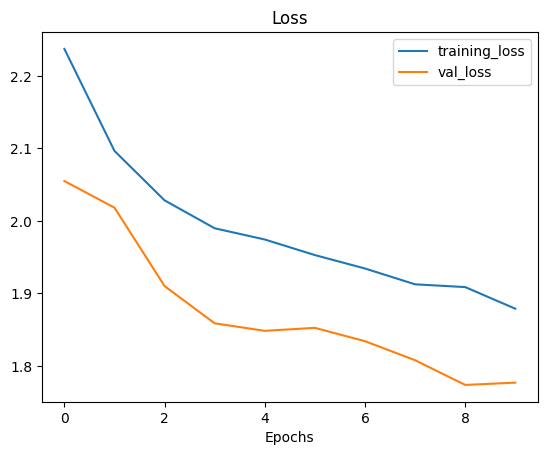

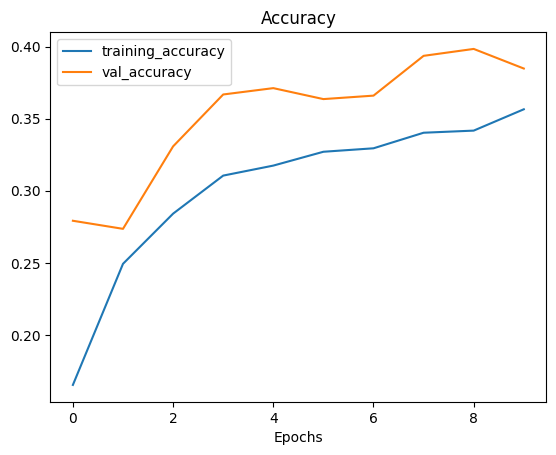

In [38]:
plot_loss_curves(history_4)

In [39]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [40]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

### This will give us the `wrong answer` since this piece of code was built for `binary classification` only

In [41]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [42]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 55ms/step


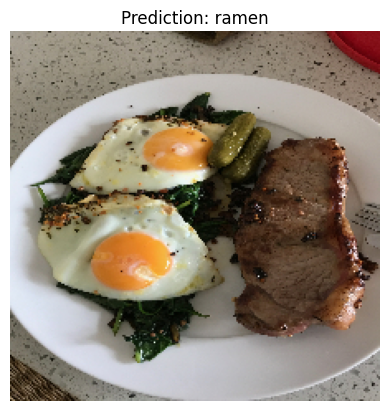

In [43]:
pred_and_plot(model_4, "images/03-steak.jpeg", class_names)

1/1 [==============================] - 0s 17ms/step


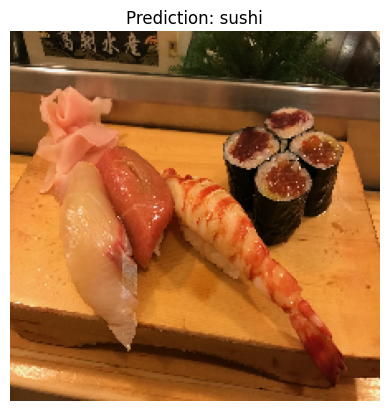

In [44]:
pred_and_plot(model_4, "images/03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 16ms/step


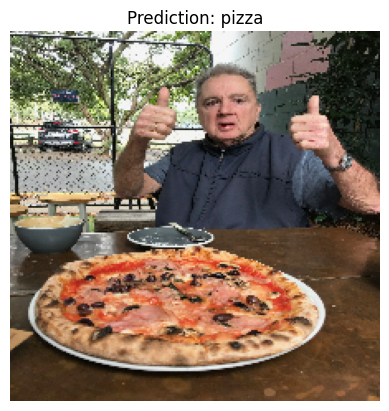

In [45]:
pred_and_plot(model_4, "images/03-pizza-dad.jpeg", class_names)

In [46]:
# Save a model
model_4.save("saved_trained_model.h5")

In [47]:
# Load in a model and evaluate it
loaded_model_4 = tf.keras.models.load_model("saved_trained_model.h5")
loaded_model_4.evaluate(test_data)

79/79 [==============================] - 4s 54ms/step - loss: 1.7768 - accuracy: 0.3848


[1.7767714262008667, 0.384799987077713]

In [48]:
# Compare our unsaved model's results (same as above)
model_4.evaluate(test_data)

79/79 [==============================] - 5s 58ms/step - loss: 1.7768 - accuracy: 0.3848


[1.7767716646194458, 0.384799987077713]